In [9]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\pricing_data_2024.csv")
df2=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\pricing_data_Cleaned.csv.csv")

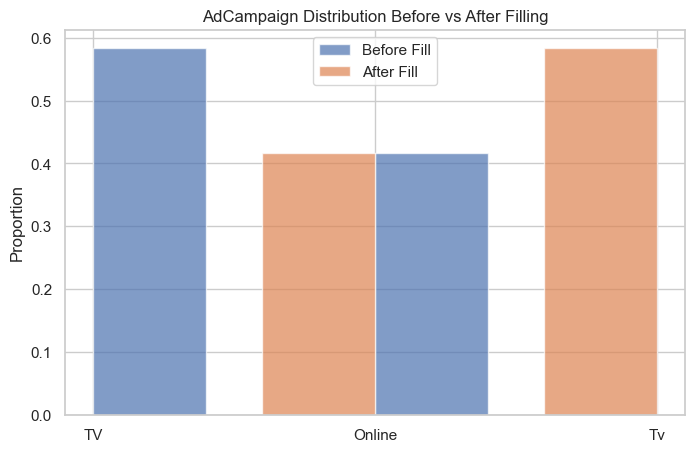

In [11]:
before = df1['AdCampaign'].value_counts(normalize=True)
after = df2['adcampaign'].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
plt.bar(before.index, before.values, width=0.4, label='Before Fill', align='edge', alpha=0.7)
plt.bar(after.index, after.values, width=-0.4, label='After Fill', align='edge', alpha=0.7)
plt.title("AdCampaign Distribution Before vs After Filling")
plt.ylabel("Proportion")
plt.legend()
plt.show()

In [13]:
before = df1['AdCampaign'].value_counts(normalize=True)
after = df2['adcampaign'].value_counts(normalize=True)

# 2. Combine into a DataFrame
compare_df = pd.DataFrame({'Before (%)': before * 100, 'After (%)': after * 100})

# 3. Calculate percentage change
compare_df['% Change'] = compare_df['After (%)'] - compare_df['Before (%)']

# 4. Round for clarity
compare_df = compare_df.round(2)

# 5. Show result
print(compare_df)

        Before (%)  After (%)  % Change
Online       41.69      41.65     -0.04
TV           58.31        NaN       NaN
Tv             NaN      58.35       NaN


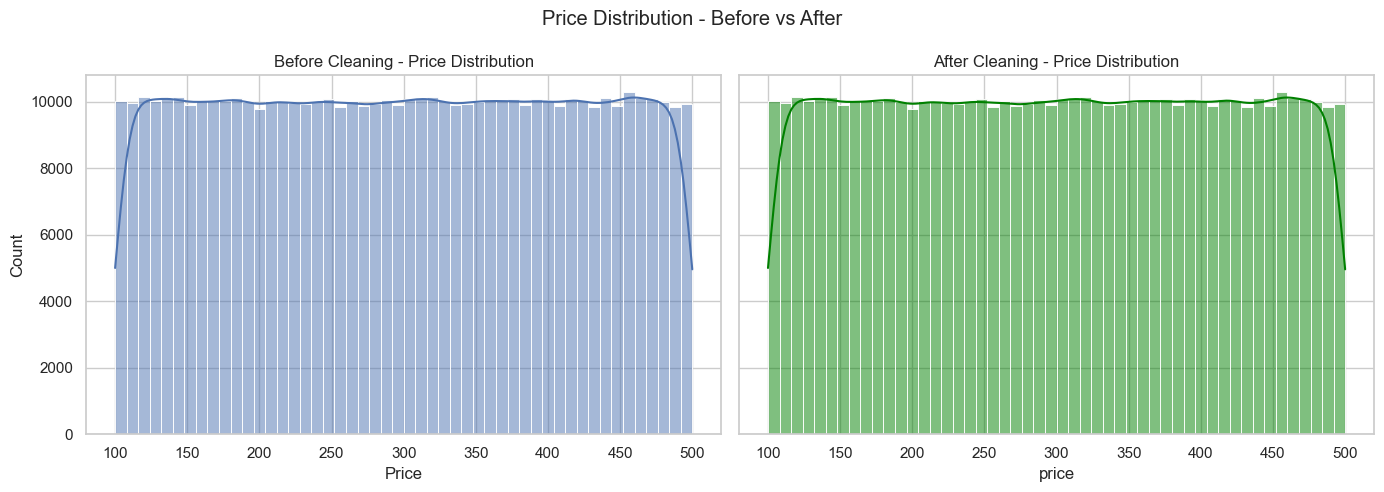

In [12]:
df1_cleaned = df1[df1['Price'].notna()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(ax=axes[0], data=df1_cleaned, x='Price', bins=50, kde=True)
axes[0].set_title("Before Cleaning - Price Distribution")

sns.histplot(ax=axes[1], data=df2, x='price', bins=50, kde=True, color='green')
axes[1].set_title("After Cleaning - Price Distribution")

plt.suptitle("Price Distribution - Before vs After")
plt.tight_layout()
plt.show()


In [15]:
# Convert df1 column names to lowercase and format
df1.columns = df1.columns.str.strip().str.lower().str.replace('%', 'percent').str.replace('(', '').str.replace(')', '')


In [16]:
# Value counts (including NaNs)
before_counts = df1['adcampaign'].value_counts(dropna=False)
after_counts = df2['adcampaign'].value_counts(dropna=False)

# Combine in a comparison table
comparison = pd.concat([before_counts, after_counts], axis=1, keys=['Before', 'After']).fillna(0)
comparison['Before'] = comparison['Before'].astype(int)
comparison['After'] = comparison['After'].astype(int)
comparison['Change'] = comparison['After'] - comparison['Before']
comparison['% Change'] = ((comparison['Change'] / comparison['Before'].replace(0, pd.NA)) * 100).round(2)

print("🔍 AdCampaign Comparison:\n")
print(comparison)


🔍 AdCampaign Comparison:

            Before   After  Change   % Change
adcampaign                                   
NaN         199966       0 -199966     -100.0
TV          174958       0 -174958     -100.0
Online      125076  208232   83156  66.484377
Tv               0  291768  291768       <NA>


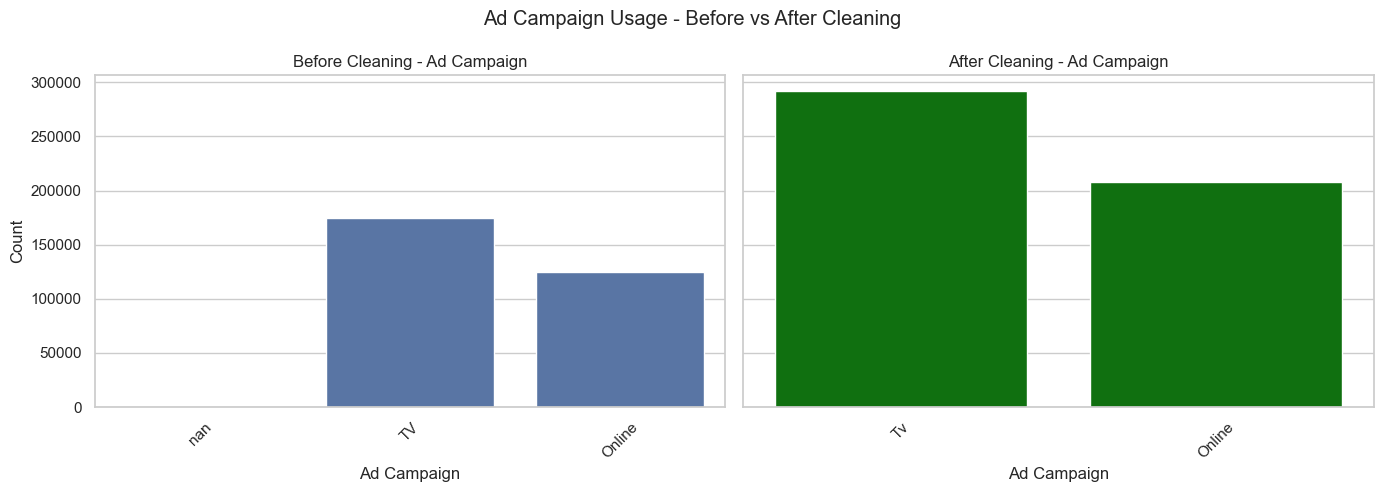

In [17]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for df1
sns.countplot(ax=axes[0], data=df1, x='adcampaign', order=df1['adcampaign'].value_counts(dropna=False).index)
axes[0].set_title("Before Cleaning - Ad Campaign")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel("Ad Campaign")
axes[0].set_ylabel("Count")

# Plot for df2
sns.countplot(ax=axes[1], data=df2, x='adcampaign', order=df2['adcampaign'].value_counts(dropna=False).index, color='green')
axes[1].set_title("After Cleaning - Ad Campaign")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel("Ad Campaign")
axes[1].set_ylabel("Count")

plt.suptitle("Ad Campaign Usage - Before vs After Cleaning")
plt.tight_layout()
plt.show()


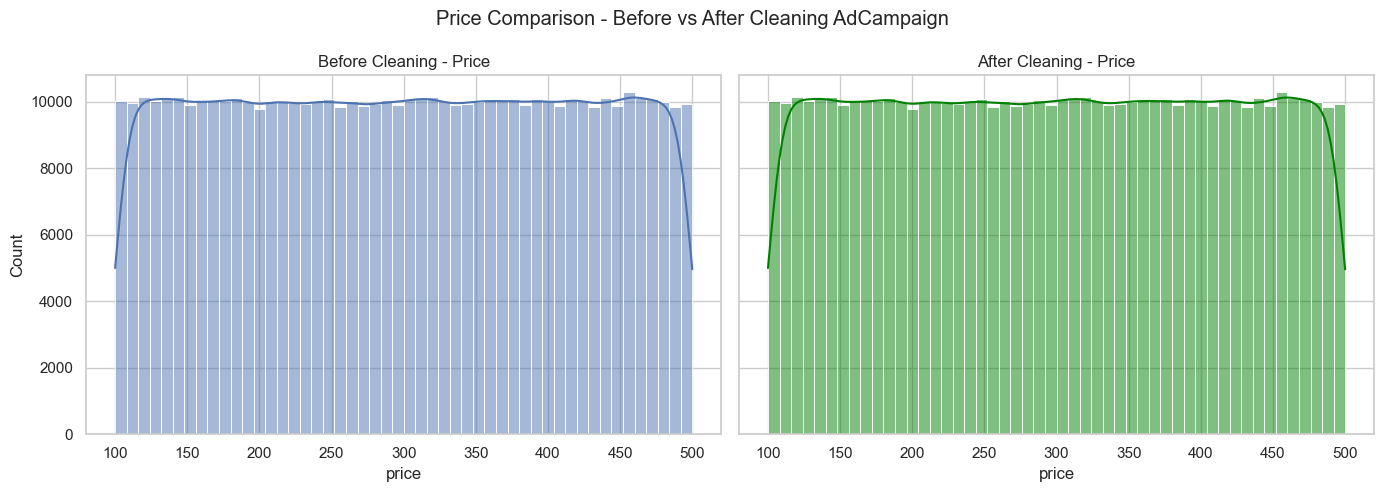

In [18]:


fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(data=df1, x='price', bins=50, kde=True, ax=axes[0])
axes[0].set_title("Before Cleaning - Price")

sns.histplot(data=df2, x='price', bins=50, kde=True, color='green', ax=axes[1])
axes[1].set_title("After Cleaning - Price")

plt.suptitle("Price Comparison - Before vs After Cleaning AdCampaign")
plt.tight_layout()
plt.show()
